In [4]:
#
# Análise Inicial
#

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

In [8]:
import statsmodels.api as sm

In [9]:
caminho_pickle = "/content/gdrive/MyDrive/PUC/pickles/"
caminho_dados = "/content/gdrive/MyDrive/PUC/SDM_2023/"
caminho_Figs = "/content/gdrive/MyDrive/PUC/figs/"

In [10]:
nome = "Petroleo cru - WTI e Brent e derivados_data-diario_EIA - Original"
df_D1 =pd.read_excel(caminho_dados + nome +".xls", sheet_name = "Data 1")
df_D2 =pd.read_excel(caminho_dados + nome +".xls", sheet_name = "Data 2")
df_D3 =pd.read_excel(caminho_dados + nome +".xls", sheet_name = "Data 3")
df_D4 =pd.read_excel(caminho_dados + nome +".xls", sheet_name = "Data 4")
df_D5 =pd.read_excel(caminho_dados + nome +".xls", sheet_name = "Data 5")
df_D6 =pd.read_excel(caminho_dados + nome +".xls", sheet_name = "Data 6")
df_D7 =pd.read_excel(caminho_dados + nome +".xls", sheet_name = "Data 7")

In [11]:
df_D1.shape ,df_D2.shape,df_D3.shape,df_D4.shape,df_D5.shape,df_D6.shape,df_D7.shape

((9686, 3), (9409, 3), (5182, 2), (9405, 2), (6915, 4), (8440, 2), (7855, 2))

In [12]:
def organiza_df(df):
  """
  # Tratamento das DFs
  # Linha 1 mostra nome das series  -
  #  Alterar nome das colunas
  # Linha 0 é cabeçalho - apagar linhas 0 e 1
  # Resetar indice
  # apagar coluna INDEX
  # Alterar tipos das variáveis - Data e Float
  """
  # Captura nome das séries
  df.columns = df.loc[1].values.tolist()
  # Apaga linha 0 e 1
  df.drop(index=df.index[:2], inplace = True)
  # Acerta tipos
  df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')
  for i in range(1,df.shape[1]):
    df[df.columns[i]] = df[df.columns[i]].astype(float)
  # Reset INDEX
  df.reset_index(inplace = True)
  df.drop(['index'], axis = 1, inplace = True)
  df.set_index(['Date'], inplace = True)
  #
  #df.fillna(0, inplace  = True)
  return df

In [13]:
df_D1 = organiza_df(df_D1)
df_D2 = organiza_df(df_D2)
df_D3 = organiza_df(df_D3)
df_D4 = organiza_df(df_D4)
df_D5 = organiza_df(df_D5)
df_D6 = organiza_df(df_D6)
df_D7 = organiza_df(df_D7)

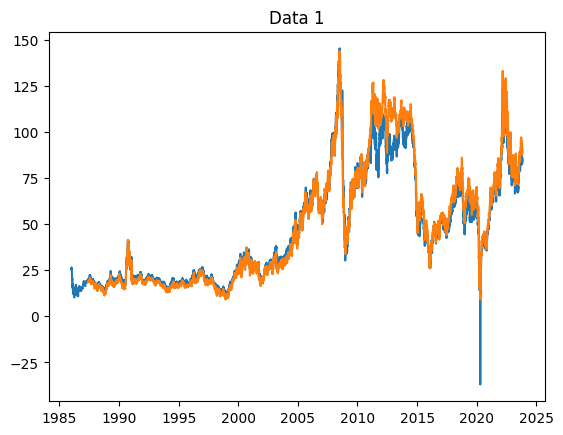

In [14]:
plt.plot(df_D1)
plt.title("Data 1")
plt.show();

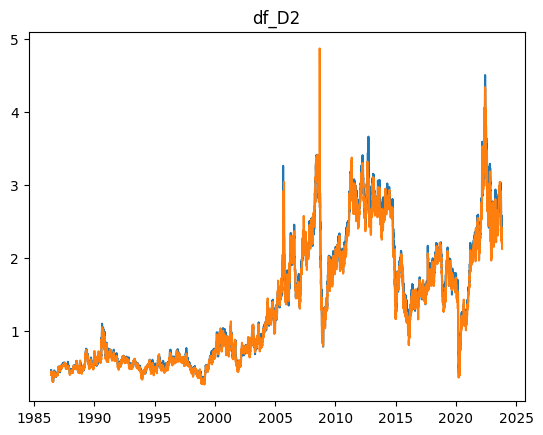

In [15]:
plt.plot(df_D2)
plt.title("df_D2")
plt.show();

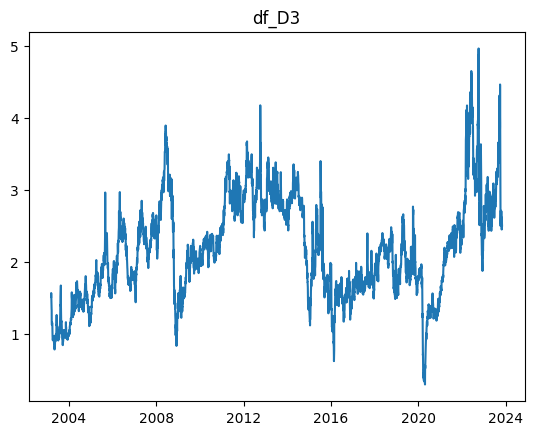

In [16]:
plt.plot(df_D3)
plt.title("df_D3")
plt.show();

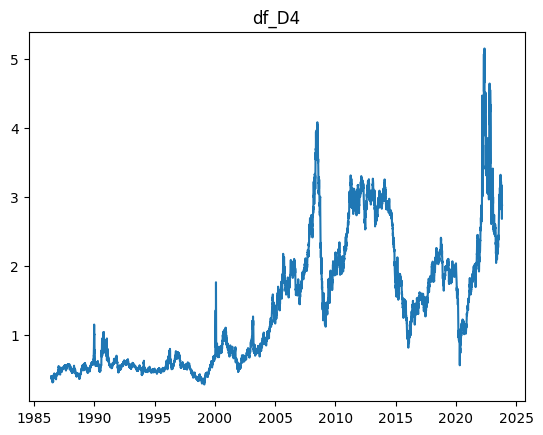

In [17]:
plt.plot(df_D4)
plt.title("df_D4")
plt.show();

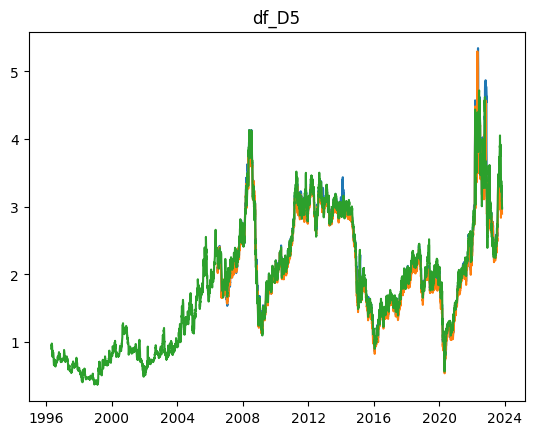

In [18]:
plt.plot(df_D5)
plt.title("df_D5")
plt.show();

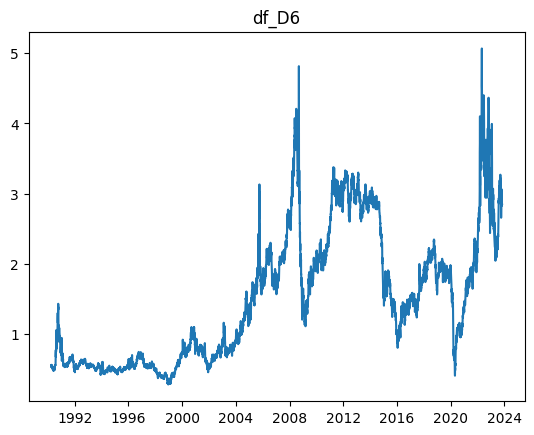

In [19]:
plt.plot(df_D6)
plt.title("df_D6")
plt.show();

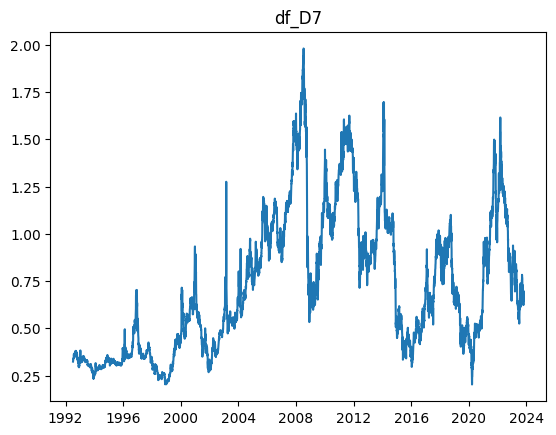

In [20]:
plt.plot(df_D7)
plt.title("df_D7")
plt.show();

In [21]:
df_D1.index.min(), df_D2.index.min(),df_D3.index.min(), df_D4.index.min(), df_D5.index.min(), df_D6.index.min(), df_D7.index.min()

(Timestamp('1986-01-02 00:00:00'),
 Timestamp('1986-06-02 00:00:00'),
 Timestamp('2003-03-11 00:00:00'),
 Timestamp('1986-06-02 00:00:00'),
 Timestamp('1996-04-17 00:00:00'),
 Timestamp('1990-04-02 00:00:00'),
 Timestamp('1992-07-09 00:00:00'))

In [22]:
df_D1.index.max(), df_D2.index.max(),df_D3.index.max(), df_D4.index.max(), df_D5.index.max(), df_D6.index.max(), df_D7.index.max()

(Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-10-30 00:00:00'))

In [23]:
df_D1.isna().sum()

Cushing, OK WTI Spot Price FOB (Dollars per Barrel)    154
Europe Brent Spot Price FOB (Dollars per Barrel)       434
dtype: int64

In [24]:
df_D1.head()

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel)
Date,,
1986-01-02,25.56,NaN
1986-01-03,26.00,NaN
1986-01-06,26.53,NaN
1986-01-07,25.85,NaN
1986-01-08,25.87,NaN


In [25]:
#df_D1.reset_index(inplace = True)

In [26]:
colunas = df_D1.columns

In [27]:
colunas

Index(['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)', 'Europe Brent Spot Price FOB (Dollars per Barrel)'], dtype='object')

In [28]:
lista = [10, np.nan,np.nan, 0]
teste = pd.DataFrame(lista, columns=['dados'])

In [29]:
teste

,dados
0,10.0
1,NaN
2,NaN
3,0.0


In [30]:
teste.dados.mean()

5.0

In [31]:
#df_D1[colunas[1]]
#df_D1.loc["1986-01-03":"1986-02-03"]
#df_D1[df_D1.index<"1986-01-10"]
#df_D1[(df_D1.index.year ==1986) & (df_D1.index.month == 1)]
#df_D1[(df_D1.index.year ==1986) & (df_D1.index.month == 1)][colunas[1]].mean()
#df_D1[(df_D1.index.year ==1985) & (df_D1.index.month == 1)].mean()
#df_D1[(df_D1.index.year ==1986) & (df_D1.index.month == 1)].mean()[colunas[0]]
df_D1[(df_D1.index.year ==1986) & (df_D1.index.month == 1)].mean()

Cushing, OK WTI Spot Price FOB (Dollars per Barrel)    22.925455
Europe Brent Spot Price FOB (Dollars per Barrel)             NaN
dtype: float64

# Criação BD Mensal

In [32]:
data_base = pd.date_range(start='1986-01-01', end='2023-10-31', freq = "M")

In [33]:
colunas_D1 = df_D1.columns
colunas_D2 = df_D2.columns
colunas_D3 = df_D3.columns
colunas_D4 = df_D4.columns
colunas_D5 = df_D5.columns
colunas_D6 = df_D6.columns
colunas_D7 = df_D7.columns

In [34]:
colunas_D1.shape, colunas_D2.shape, colunas_D3.shape, colunas_D4.shape, colunas_D5.shape, colunas_D6.shape, colunas_D7.shape

((2,), (2,), (1,), (1,), (3,), (1,), (1,))

In [35]:
dados=[]
for data in data_base:
  #print(data.year, ":", data.month)
  dados_D1_C0 = df_D1[(df_D1.index.year == data.year) & (df_D1.index.month == data.month)][colunas_D1[0]].mean()
  dados_D1_C1 = df_D1[(df_D1.index.year == data.year) & (df_D1.index.month == data.month)][colunas_D1[1]].mean()
  dados_D2_C0 = df_D2[(df_D2.index.year == data.year) & (df_D2.index.month == data.month)][colunas_D2[0]].mean()
  dados_D2_C1 = df_D2[(df_D2.index.year == data.year) & (df_D2.index.month == data.month)][colunas_D2[1]].mean()
  dados_D3_C0 = df_D3[(df_D3.index.year == data.year) & (df_D3.index.month == data.month)][colunas_D3[0]].mean()
  dados_D4_C0 = df_D4[(df_D4.index.year == data.year) & (df_D4.index.month == data.month)][colunas_D4[0]].mean()
  dados_D5_C0 = df_D5[(df_D5.index.year == data.year) & (df_D5.index.month == data.month)][colunas_D5[0]].mean()
  dados_D5_C1 = df_D5[(df_D5.index.year == data.year) & (df_D5.index.month == data.month)][colunas_D5[1]].mean()
  dados_D5_C2 = df_D5[(df_D5.index.year == data.year) & (df_D5.index.month == data.month)][colunas_D5[2]].mean()
  dados_D6_C0 = df_D6[(df_D6.index.year == data.year) & (df_D6.index.month == data.month)][colunas_D6[0]].mean()
  dados_D7_C0 = df_D7[(df_D7.index.year == data.year) & (df_D7.index.month == data.month)][colunas_D7[0]].mean()
  dados.append([dados_D1_C0, dados_D1_C1, dados_D2_C0, dados_D2_C1, dados_D3_C0, dados_D4_C0,
                dados_D5_C0, dados_D5_C1, dados_D5_C2, dados_D6_C0, dados_D7_C0,])

In [36]:
#Cria DataFrame com dados
df_dados = pd.DataFrame(dados, columns = [colunas_D1[0], colunas_D1[1], colunas_D2[0], colunas_D2[1],
                               colunas_D3[0], colunas_D4[0], colunas_D5[0], colunas_D5[1], colunas_D5[2],
                               colunas_D6[0], colunas_D7[0]], index = data_base)

In [37]:
# Exporta df
df_dados.to_csv(caminho_dados + "series_SDM.csv")
df_dados.to_pickle(caminho_dados + "series_SDM.pkl")

In [38]:
df_dados.shape

(454, 11)

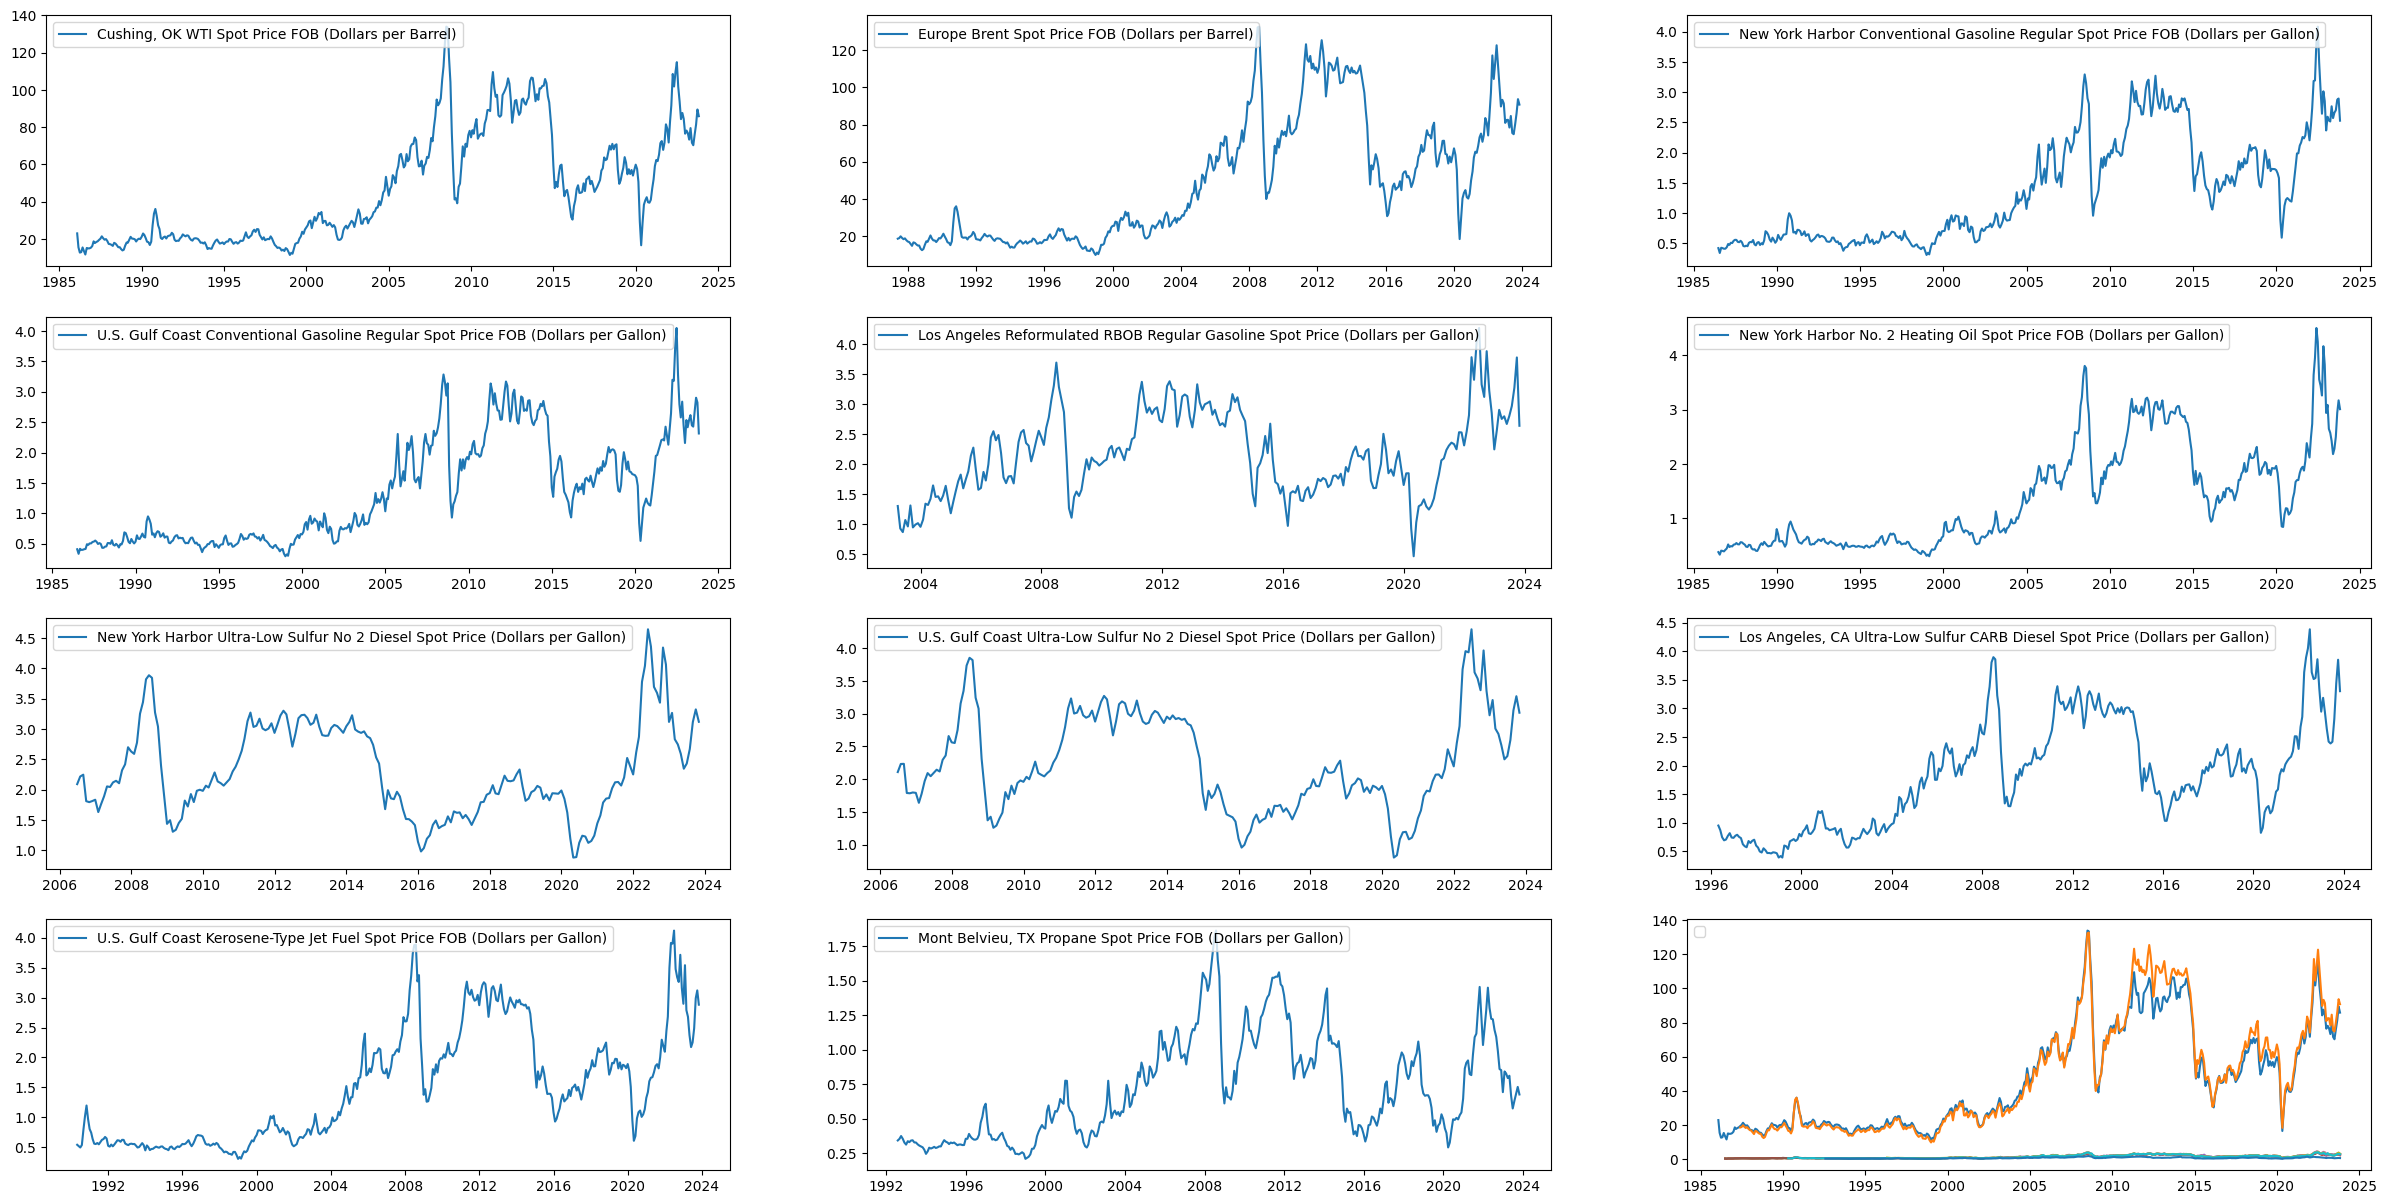

In [39]:
fontSize = 10
fig, axs = plt.subplots(4, 3,figsize=(30, 15))
axs[0, 0].plot(df_dados[df_dados.columns[0]], label = df_dados.columns[0])
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].legend(loc="upper left", fontsize= fontSize)

axs[0, 1].plot(df_dados[df_dados.columns[1]], label = df_dados.columns[1])
axs[0, 1].legend(loc="upper left", fontsize= fontSize)

axs[0, 2].plot(df_dados[df_dados.columns[2]], label = df_dados.columns[2])
axs[0, 2].legend(loc="upper left", fontsize= fontSize)

axs[1, 0].plot(df_dados[df_dados.columns[3]], label = df_dados.columns[3])
axs[1, 0].legend(loc="upper left", fontsize= fontSize)

axs[1, 1].plot(df_dados[df_dados.columns[4]], label = df_dados.columns[4])
axs[1, 1].legend(loc="upper left", fontsize= fontSize)

axs[1, 2].plot(df_dados[df_dados.columns[5]], label = df_dados.columns[5])
axs[1, 2].legend(loc="upper left", fontsize= fontSize)

axs[2, 0].plot(df_dados[df_dados.columns[6]], label = df_dados.columns[6])
axs[2, 0].legend(loc="upper left", fontsize= fontSize)

axs[2, 1].plot(df_dados[df_dados.columns[7]], label = df_dados.columns[7])
axs[2, 1].legend(loc="upper left", fontsize= fontSize)

axs[2, 2].plot(df_dados[df_dados.columns[8]], label = df_dados.columns[8])
axs[2, 2].legend(loc="upper left", fontsize= fontSize)


axs[3, 0].plot(df_dados[df_dados.columns[9]], label = df_dados.columns[9])
axs[3, 0].legend(loc="upper left", fontsize= fontSize)

axs[3, 1].plot(df_dados[df_dados.columns[10]], label = df_dados.columns[10])
axs[3, 1].legend(loc="upper left", fontsize= fontSize)

axs[3, 2].plot(df_dados)
axs[3, 2].legend(loc="upper left", fontsize= fontSize)

fig.savefig(caminho_Figs + 'Series.png', dpi=300)

#for ax in axs.flat:
#    ax.set(xlabel='tempo', ylabel='preços')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()